# Jamboree Analysis and Prediction 

## About Dataset

Context

Jamboree has helped thousands of students secure admissions to top international universities by analyzing their test scores from exams like the GMAT, GRE, and SAT.

Recently, they introduced a college admission probability estimator, allowing students to assess their chances of getting into Ivy League colleges. This feature uses a structured evaluation method to provide a realistic estimate of graduate admission probabilities, helping students make informed application decisions.

### Importing Dependencies

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing and Cleaning

In [62]:
df = pd.read_csv('jamboree_dataset.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [64]:
# Checking the total number of rows and columns in the dataset

df.shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')


The dataset has 500 rows and 9 columns


In [65]:
# Checking for missing values in the dataset

df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [66]:
# Checking the data types of the columns in the dataset

df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [67]:
# Checking for duplicates in the dataset

df.duplicated().sum()

0

In [68]:
# Removing unnecessary space in 'Chance of Admit' columns title
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

### Descriptive Statistics and Summary

In [69]:
# Checking for the statistical summary of the dataset

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [70]:
# Dropping the serial number column as it has no significance on the dataset

df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Figure size 1200x600 with 0 Axes>

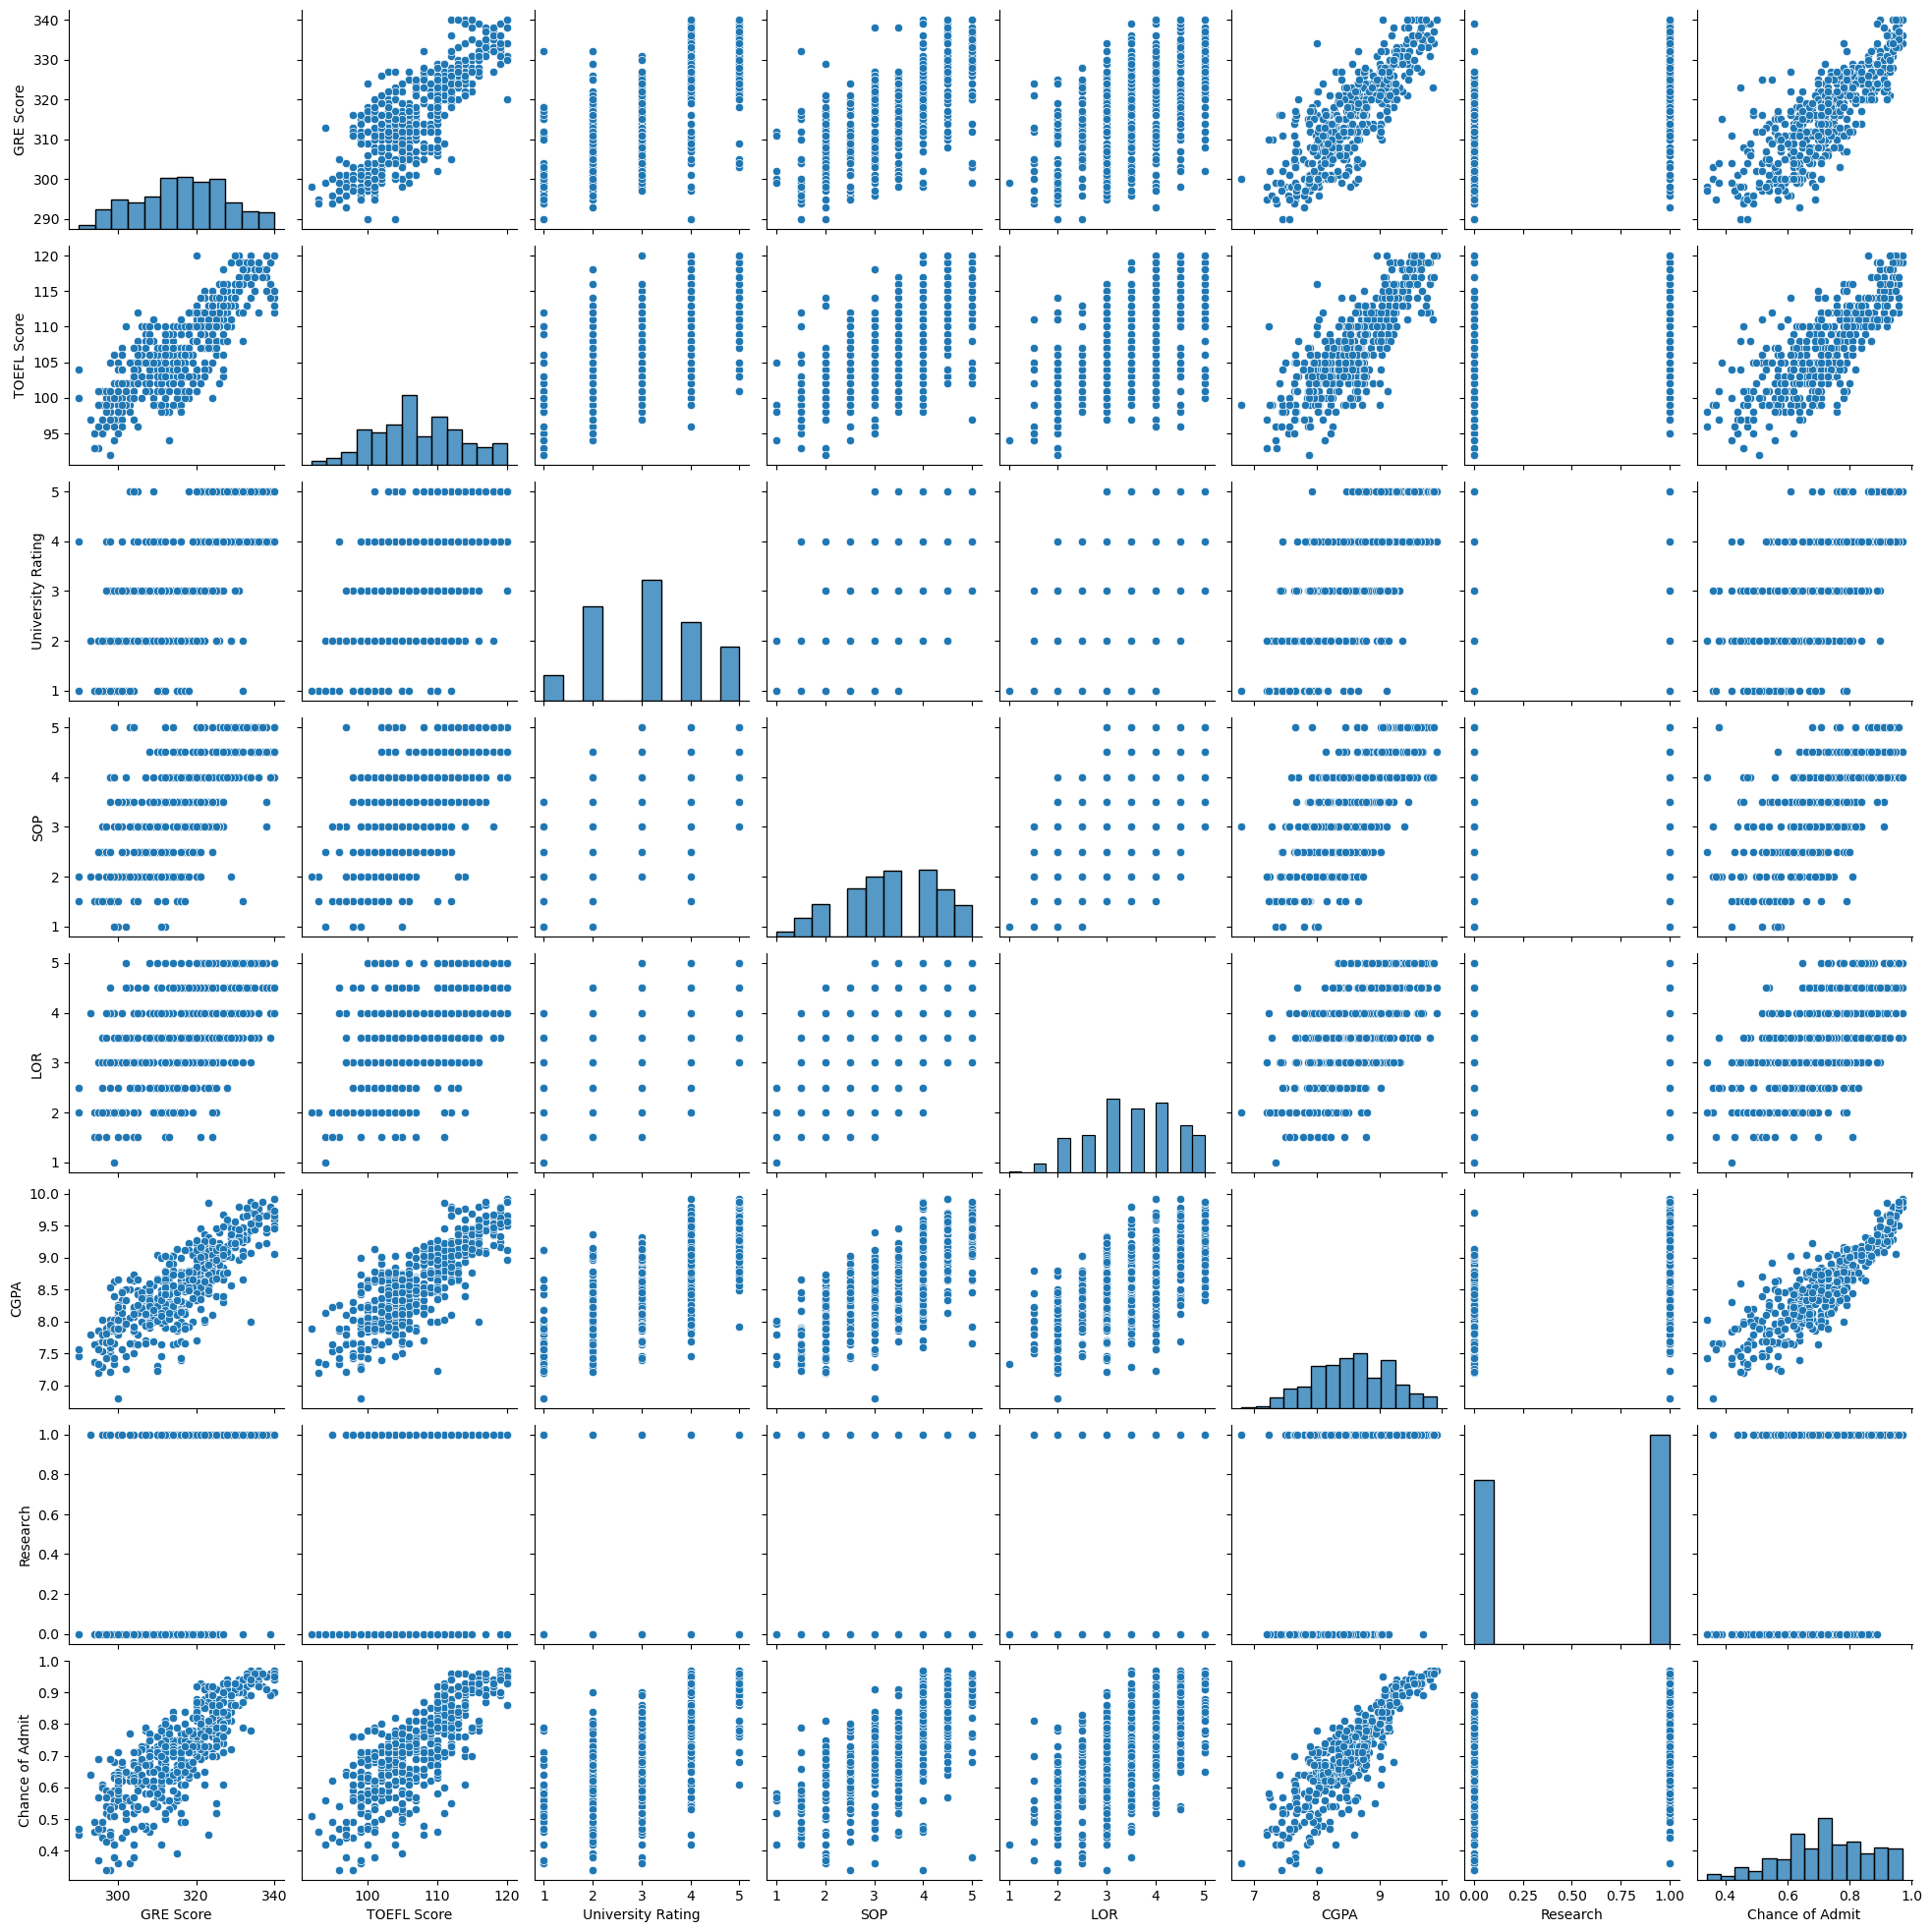

In [71]:
# Identifying the spread of the dataset
plt.figure(figsize=(12, 6), facecolor='white')

sns.pairplot(df)

In [72]:
# Interquartile Range (IQR) Score for the dataset

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [73]:
# Detection of Outliers in the dataset

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print('---'* 30)
print(upper_bound)

GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.75875
Research              -1.50000
Chance of Admit        0.34500
dtype: float64
------------------------------------------------------------------------------------------
GRE Score            350.50000
TOEFL Score          125.50000
University Rating      7.00000
SOP                    6.25000
LOR                    5.50000
CGPA                  10.40875
Research               2.50000
Chance of Admit        1.10500
dtype: float64


In [74]:
outliers = (df < lower_bound) | (df > upper_bound)
outliers.sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64

-0.03984185809159066


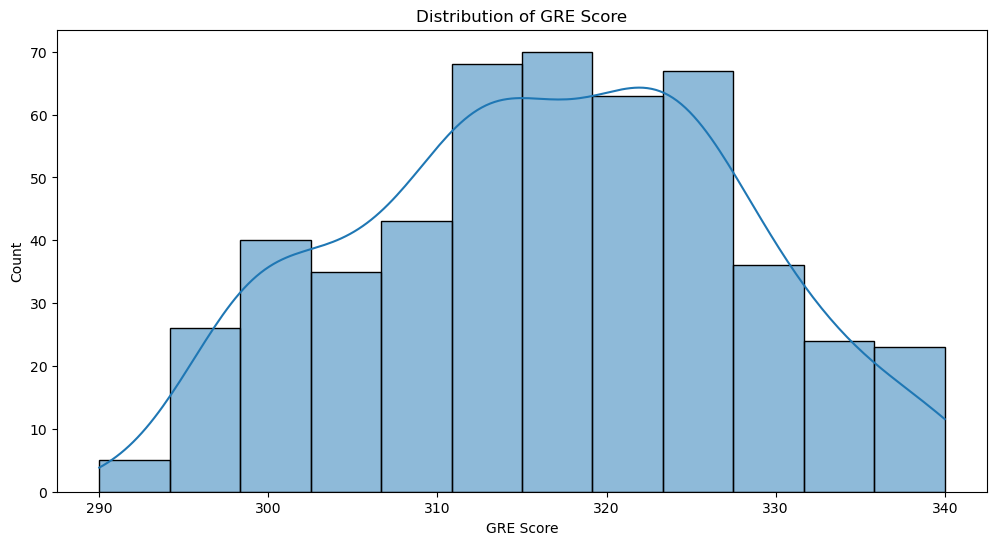

0.09560097235726285


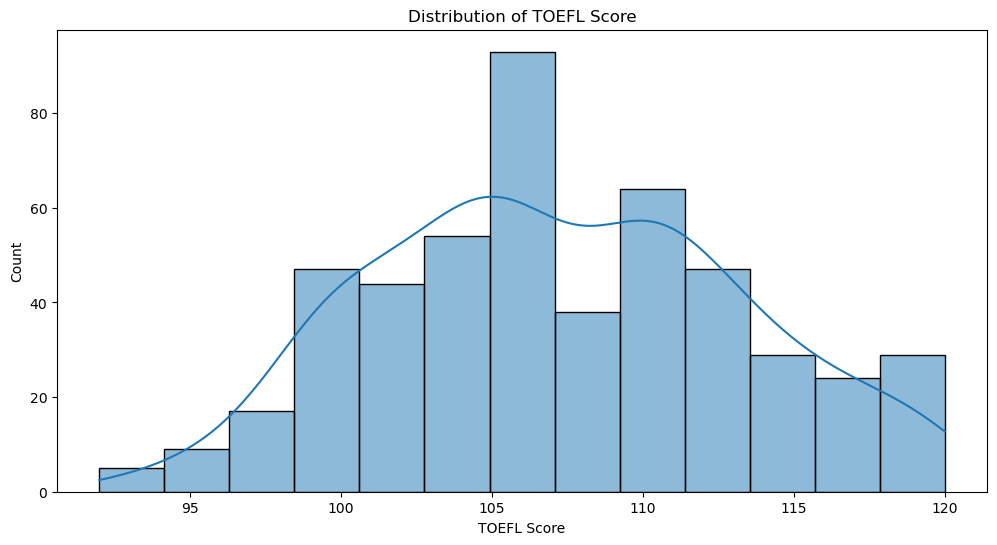

0.09029498312712977


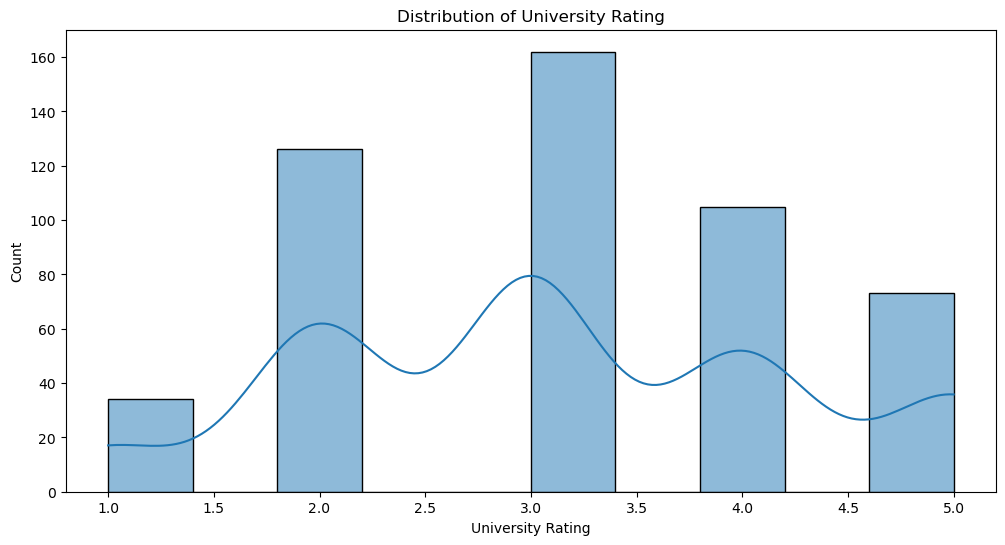

-0.22897239628779945


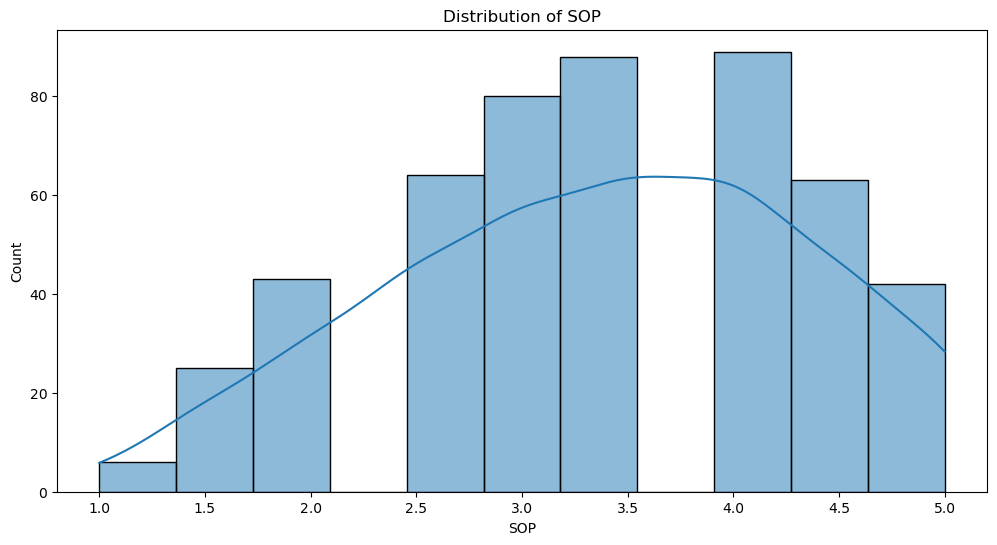

-0.1452903146082398


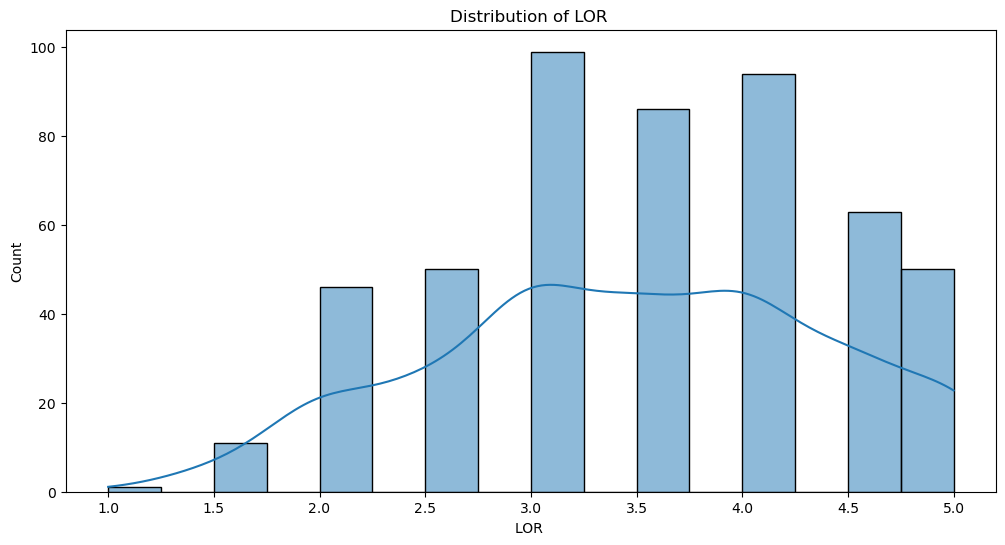

-0.026612517318359303


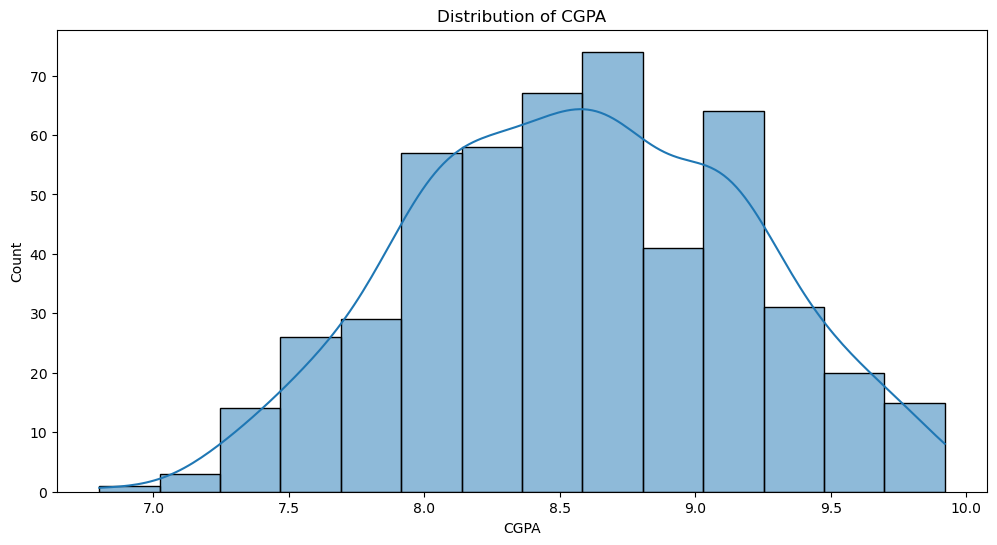

-0.24247492100796933


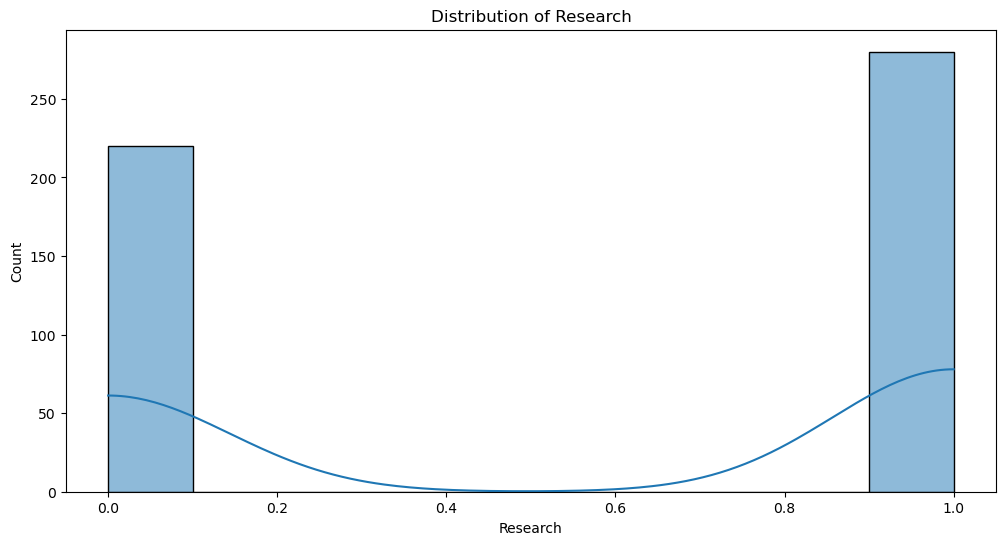

-0.289966210041158


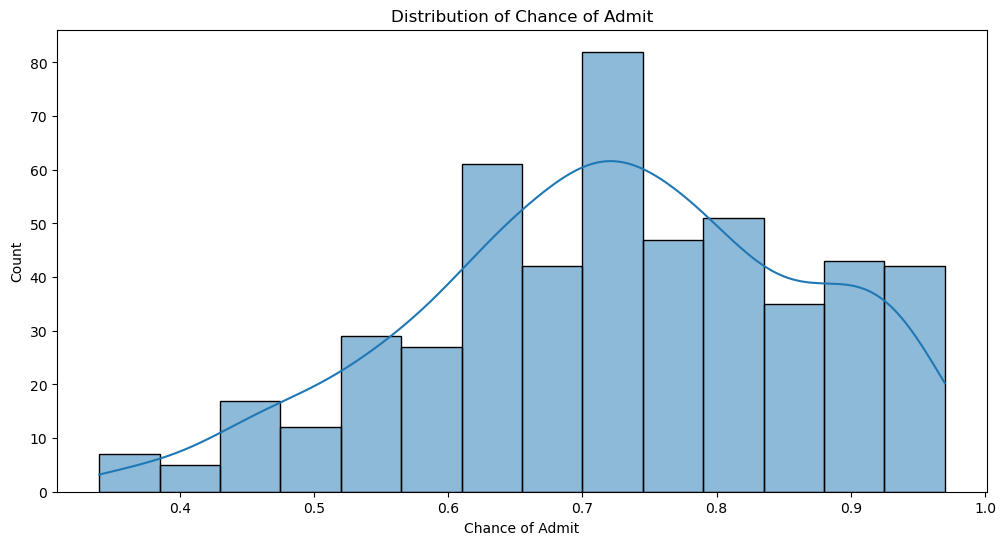

In [75]:
# Visualizing the distributin of outliers in the dataset
for i in df.columns:
    plt.figure(figsize=(12, 6))
    print(df[i].skew())
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [76]:
# Checking for the correlation between the columns in the dataset
correlation = df.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


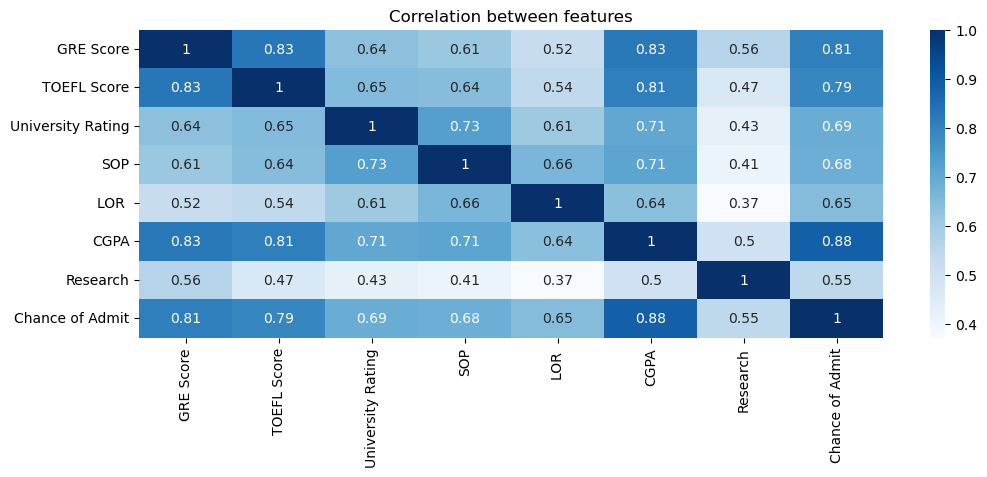

In [77]:
# Visualizing the correlation between the columns in the dataset

plt.figure(figsize=(12, 4))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation between features')
plt.show()

The map shows that the features that strongly affect the chance of being admitted are 'GRE Score', 'TOEFL Score', and 'CGPA'. The other features have quite a minimal correlation; with the least being 'Research'.

### Model Build

In [78]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [81]:
# Splitting the dataset into features and target variable

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']
print(X.shape, y.shape)

(500, 7) (500,)


In [82]:
# Splitting the data into training and testung sets and scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledx = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaledx, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [83]:
# Building the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lr_model.predict(X_test)
print(y_test, y_pred)

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit, Length: 100, dtype: float64 [0.91457473 0.79518127 0.57265986 0.70736968 0.81588282 0.86206561
 0.47459746 0.64850923 0.82378728 0.80741498 0.72193204 0.72589118
 0.65632227 0.93677168 0.8241518  0.50979177 0.83931942 0.59727295
 0.53339576 0.57155958 0.66548168 0.55305833 0.72232308 0.79506004
 0.78027648 0.60248654 0.94840363 0.84741471 0.62777011 0.74343096
 0.55533035 0.73004034 0.54474225 0.86116288 0.65713016 0.7371816
 0.55423839 0.95718977 0.64364267 0.71057279 0.97036982 0.57495143
 0.67075391 0.85830422 0.94112903 0.57793762 0.9583926  0.83902765
 0.79591651 0.92570648 0.88805969 0.56366238 0.70359711 0.52658929
 0.9536427  0.59746814 0.95600396 0.73916386 0.66256982 0.5012903
 0.62950759 0.68031188 0.59896721 0.59203806 0.44085868 0.58866369
 0.8667547  0.89783006 0.65831807 0.70667392 0.6176818  0.78587721
 0.69152566 0.5

In [92]:
# Checking the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.00370465539878841
R2 Score: 0.8188432567829629


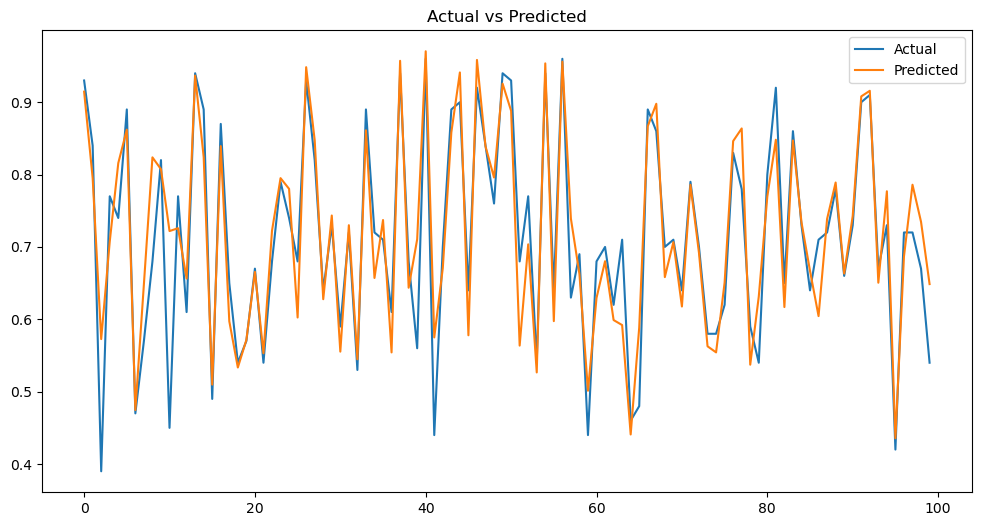

In [93]:
# Plotting the actual results against the predicted results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()

In [94]:
# Checking the coefficients of the model
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
GRE Score,0.027470
TOEFL Score,0.018202
University Rating,0.002935
SOP,0.001796
LOR,0.015937
CGPA,0.067990
Research,0.011927


In [95]:
# Checking the intercept of the model
intercept = lr_model.intercept_
intercept

0.7228307247435319